In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import learning_curve
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  # Import KerasClassifier 
import tkinter as tk

In [29]:
# Define a function to create your Keras model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=len(label_encoders['Severity'].classes_), output_dim=10, input_length=1))
    model.add(tf.keras.layers.LSTM(50))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:

data = pd.read_csv(r"C:\Users\amkb2\Downloads\archive\WA_Fn-UseC_-IT-Help-Desk.csv")

In [31]:
data.head()

# %%
print(data.describe())


# %%
print(data.isnull().sum())

# %%
print(data.duplicated().sum())

              ticket      requestor        ITOwner       daysOpen
count  100000.000000  100000.000000  100000.000000  100000.000000
mean    50000.500000     999.030670      25.461000       6.842830
std     28867.657797     577.507916      14.447961       7.377876
min         1.000000       1.000000       1.000000       0.000000
25%     25000.750000     499.000000      13.000000       1.000000
50%     50000.500000     999.000000      26.000000       5.000000
75%     75000.250000    1499.000000      38.000000      10.000000
max    100000.000000    2000.000000      50.000000      54.000000
ticket                0
requestor             0
RequestorSeniority    0
ITOwner               0
FiledAgainst          0
TicketType            0
Severity              0
Priority              0
daysOpen              0
Satisfaction          0
dtype: int64
0


C:\Users\amkb2\AppData\Local\Temp\ipykernel_15884\1301773123.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


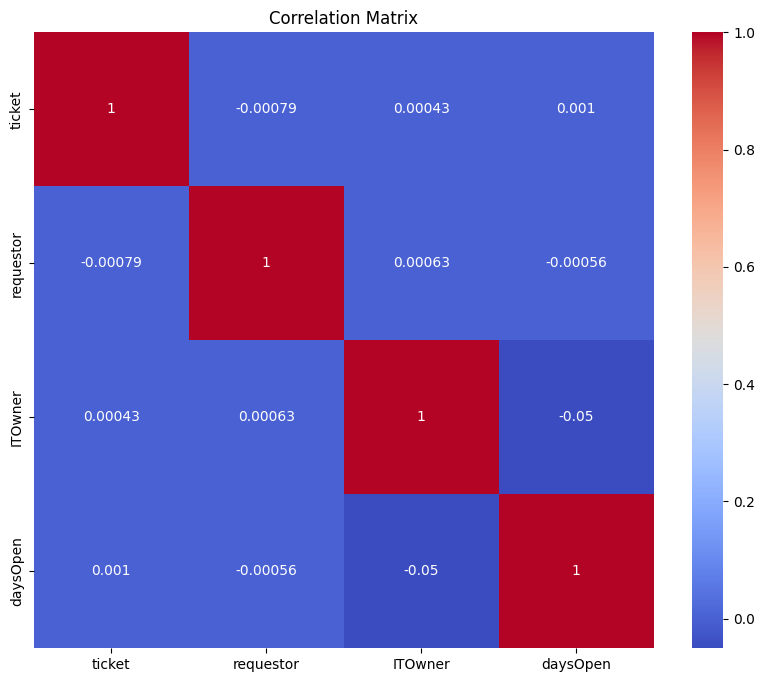

In [32]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [33]:
categorical_columns = ['RequestorSeniority', 'ITOwner', 'FiledAgainst', 'TicketType', 'Severity', 'Priority']

# %%
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# %%
scaler = StandardScaler()
data['daysOpen'] = scaler.fit_transform(data['daysOpen'].values.reshape(-1, 1))


# %%
data['IsP1'] = (data['Severity'] == label_encoders['Severity'].transform(['2 - Normal'])[0]).astype(int)

# %%
X = data.drop(['IsP1'], axis=1)
y = data['IsP1']


In [34]:
# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [35]:
# Define the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(label_encoders['Severity'].classes_), output_dim=10, input_length=1))
model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [36]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# %%
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# %%
# Train your LSTM model
model = create_model()
model.fit(X['Severity'], y, epochs=10, validation_split=0.3)  # Use validation split for simplicity

Epoch 1/10
2188/2188 [==============================] - 21s 8ms/step - loss: 0.0314 - accuracy: 0.9959 - val_loss: 1.9104e-04 - val_accuracy: 1.0000
Epoch 2/10
2188/2188 [==============================] - 17s 8ms/step - loss: 8.5114e-05 - accuracy: 1.0000 - val_loss: 3.2810e-05 - val_accuracy: 1.0000
Epoch 3/10
2188/2188 [==============================] - 16s 7ms/step - loss: 1.7884e-05 - accuracy: 1.0000 - val_loss: 8.4759e-06 - val_accuracy: 1.0000
Epoch 4/10
2188/2188 [==============================] - 16s 7ms/step - loss: 4.8653e-06 - accuracy: 1.0000 - val_loss: 2.4426e-06 - val_accuracy: 1.0000
Epoch 5/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.4327e-06 - accuracy: 1.0000 - val_loss: 7.3881e-07 - val_accuracy: 1.0000
Epoch 6/10
2188/2188 [==============================] - 17s 8ms/step - loss: 4.4026e-07 - accuracy: 1.0000 - val_loss: 2.3322e-07 - val_accuracy: 1.0000
Epoch 7/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.4236e-0

In [37]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test['Severity'], y_test)
print(f"Test Accuracy: {accuracy}")

469/469 [==============================] - 2s 4ms/step - loss: 1.7725e-08 - accuracy: 1.0000
Test Accuracy: 1.0


In [38]:
# Make predictions
y_pred = model.predict(X_test['Severity'])

469/469 [==============================] - 3s 4ms/step


In [45]:
# Define a function to predict severity based on user inputs
def predict_severity():
    # Get user inputs
    requester_seniority = int(requester_seniority_entry.get())
    it_owner = int(it_owner_entry.get())
    filed_against = int(filed_against_entry.get())
    ticket_type = int(ticket_type_entry.get())
    priority = int(priority_entry.get())
    
    # Create a dataframe with user inputs
    user_inputs = pd.DataFrame({
        'RequestorSeniority': [requester_seniority],
        'ITOwner': [it_owner],
        'FiledAgainst': [filed_against],
        'TicketType': [ticket_type],
        'Priority': [priority]
    })
    
    # Make prediction
    severity = model.predict(user_inputs['Severity'])[0][0]

    # Display prediction
    prediction_label.config(text=f"Predicted Severity: {severity}")
    requester_seniority = int(requester_seniority_entry.get())
    it_owner = int(it_owner_entry.get())
    filed_against = int(filed_against_entry.get())
    ticket_type = int(ticket_type_entry.get())
    priority = int(priority_entry.get())
    
    # Create a dataframe with user inputs
    user_inputs = pd.DataFrame({
        'RequestorSeniority': [requester_seniority],
        'ITOwner': [it_owner],
        'FiledAgainst': [filed_against],
        'TicketType': [ticket_type],
        'Priority': [priority]
    })

In [56]:
# Encode user inputs
for col in categorical_columns:
    le = label_encoders[col]
    user_inputs[col] = le.transform(user_inputs[col])

# Make prediction
severity = model.predict(user_inputs['Severity'])[0][0]

# Display prediction
prediction_label.config(text=f"Predicted Severity: {severity}")


NameError: name 'user_inputs' is not defined

In [57]:
# Create a tkinter window
window = tk.Tk()
window.title("Severity Predictor")

''

In [58]:
# Create input fields and labels
requester_seniority_label = tk.Label(window, text="Requester Seniority:")
requester_seniority_entry = tk.Entry(window)
it_owner_label = tk.Label(window, text="IT Owner:")
it_owner_entry = tk.Entry(window)
filed_against_label = tk.Label(window, text="Filed Against:")
filed_against_entry = tk.Entry(window)
ticket_type_label = tk.Label(window, text="Ticket Type:")
ticket_type_entry = tk.Entry(window)
priority_label = tk.Label(window, text="Priority:")
priority_entry = tk.Entry(window)

In [59]:
# Create a button to predict severity
predict_button = tk.Button(window, text="Predict Severity", command=predict_severity)

# Create a label to display prediction
prediction_label = tk.Label(window, text="")


In [61]:
# Add input fields, labels, button, and prediction label to the window
requester_seniority_label.pack()
requester_seniority_entry.pack()
it_owner_label.pack()
it_owner_entry.pack()
filed_against_label.pack()
filed_against_entry.pack()
ticket_type_label.pack()
ticket_type_entry.pack()
priority_label.pack()
priority_entry.pack()
predict_button.pack()
prediction_label.pack()

In [62]:
# Run the tkinter event loop
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\amkb2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Severity'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return se